# Intro

## Setup

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_palette('deep')

In [3]:
data_dir = '../data/raw/'

train = pd.read_csv(data_dir + 'train.csv', index_col=0).reset_index(drop=True)
test = pd.read_csv(data_dir + 'test.csv', index_col=0).reset_index(drop=True)

train.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


## Preprocessing

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  int64  
 3   heart_disease      15304 non-null  int64  
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 1.3+ MB


In [5]:
def pre1(df):
    df['hypertension'] = df['hypertension'].astype(object)
    df['heart_disease'] = df['heart_disease'].astype(object)
    df.loc[df.gender=='Other', 'gender'] == 'Male'
    return df

train = pre1(train)
test = pre1(test)

In [6]:
TARGET = 'stroke'
FEATURES = [c for c in train.columns if c not in [TARGET]]

numerical = train[FEATURES].select_dtypes(include=np.number).columns.to_list()
categorical = train[FEATURES].select_dtypes(exclude=np.number).columns.to_list()

print(f'Target: {TARGET}')
print('Features: ', FEATURES)
print(f'Shapes: {train.shape}, {test.shape}')

Target: stroke
Features:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Shapes: (15304, 11), (10204, 10)


## Quick EDA

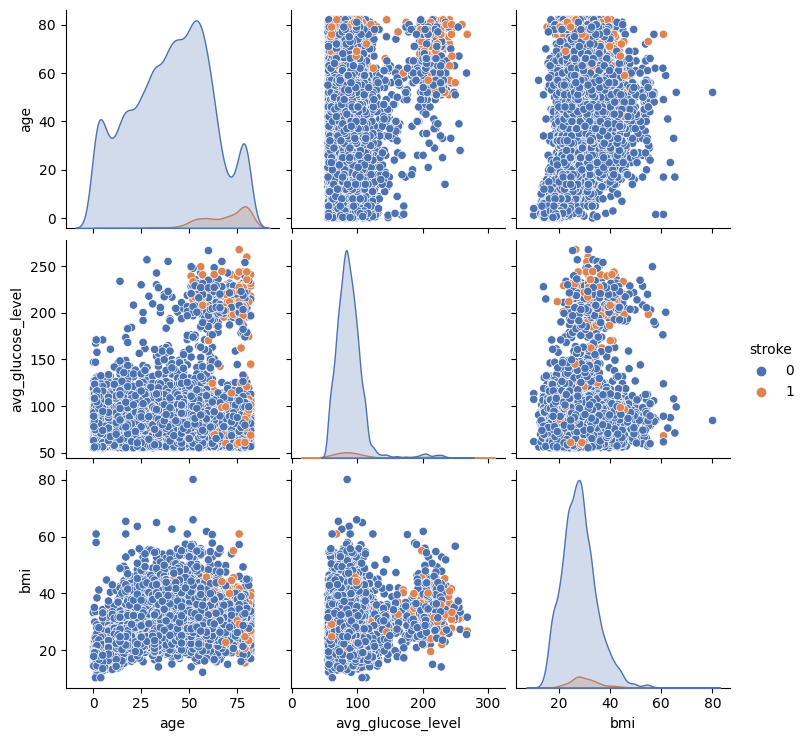

In [7]:
sns.pairplot(data=train, vars=numerical, hue=TARGET)

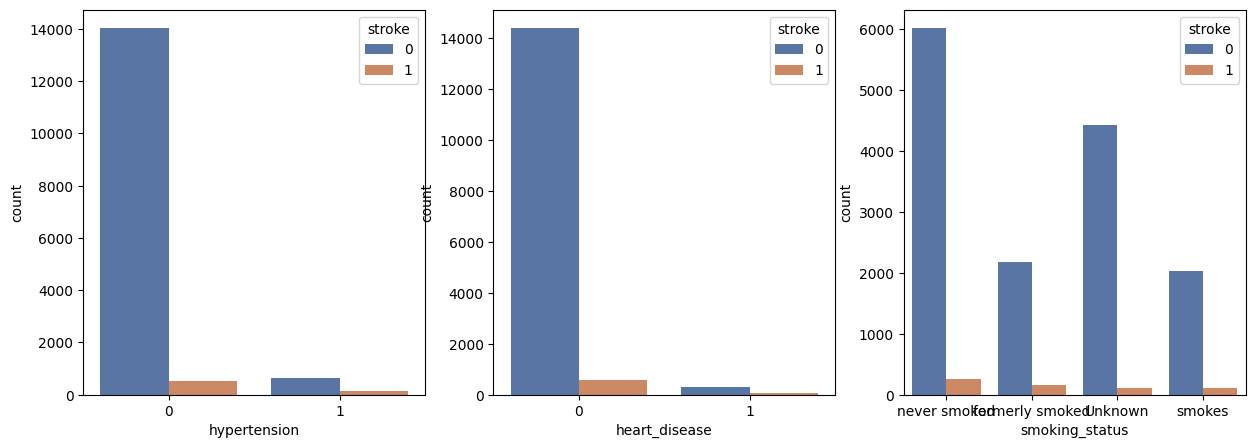

In [8]:
vars = ['hypertension', 'heart_disease', 'smoking_status']
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

for ax, var in zip(axs.flat, vars):
    sns.countplot(ax=ax, data=train, x=var, hue=TARGET)

## Save final data

In [9]:
TARGET = 'stroke'
FEATURES = [c for c in train.columns if c not in [TARGET]]

numerical = train[FEATURES].select_dtypes(include=np.number).columns.to_list()
categorical = train[FEATURES].select_dtypes(exclude=np.number).columns.to_list()

print(f'Target: {TARGET}')
print('Features: ', FEATURES)
print(f'Shapes: {train.shape}, {test.shape}')

train.info()

Target: stroke
Features:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Shapes: (15304, 11), (10204, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             15304 non-null  object 
 1   age                15304 non-null  float64
 2   hypertension       15304 non-null  object 
 3   heart_disease      15304 non-null  object 
 4   ever_married       15304 non-null  object 
 5   work_type          15304 non-null  object 
 6   Residence_type     15304 non-null  object 
 7   avg_glucose_level  15304 non-null  float64
 8   bmi                15304 non-null  float64
 9   smoking_status     15304 non-null  object 
 10  stroke             15304 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
out_path = '../data/final/'
os.makedirs(out_path, exist_ok=True)

train.to_csv(out_path + 'train.csv')
test.to_csv(out_path + 'test.csv')